In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline

# load in the data

In [2]:
requests = pd.read_csv('data/requests.csv')
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff
0,1380949200,1149,725,218,3601
1,1380949200,1225,1714,2003,3601
2,1380949200,1237,3143,1314,2218
3,1380949200,1323,3566,1330,2573
4,1380949200,1328,2466,1323,2473


In [3]:
print(requests.shape)

(383069, 5)


In [4]:
vehicle_events = pd.read_csv('data/vehicle_events.csv')
vehicle_events.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection
0,1380949200,83,2767,0,2764
1,1380949200,89,3070,0,1818
2,1380949200,112,97,0,972
3,1380949200,121,215,0,396
4,1380949200,141,1314,0,1237


In [5]:
print(vehicle_events.shape)

(543572, 5)


In [6]:
vehicle_events_pnas = pd.read_csv('data/vehicle_events_pnas.csv')
vehicle_events_pnas.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection
0,1380949230,137,1116,1,NaN
1,1380949230,321,707,1,NaN
2,1380949230,428,2818,1,NaN
3,1380949240,148,3132,1,NaN
4,1380949240,343,1738,1,NaN


In [7]:
print(vehicle_events_pnas.shape)

(436709, 5)


In [8]:
vehicle_paths = pd.read_csv('data/vehicle_paths.csv')
vehicle_paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers
0,1380949200,83,40.73062,-73.99065,0
1,1380949200,89,40.71429,-74.01153,0
2,1380949200,112,40.77178,-73.97919,0
3,1380949200,121,40.73974,-74.00249,0
4,1380949200,141,40.77114,-73.96392,0


In [9]:
print(vehicle_paths.shape)

(2643431, 5)


In [10]:
vehicle_paths_pnas= pd.read_csv('data/vehicle_paths_pnas.csv')
vehicle_paths_pnas.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers
0,1380949230,137,40.73467,-73.99459,0
1,1380949230,321,40.78573,-73.97644,0
2,1380949230,428,40.78154,-73.96041,0
3,1380949231,148,40.73478,-73.99871,0
4,1380949231,148,40.73478,-73.99871,0


In [11]:
print(vehicle_paths_pnas.shape)

(2639776, 5)


# task 1
***What is the serving rate for each scenario throughout the day, comparing to the overall serving rate?
Serving rate is the number of successfully matched trip in a period of time. For example, is the serving
rate higher in the rush hour or at night?***<br>

*****If the trip cannot be served, its actual pickup intersection ID or actual dropoff intersection ID will be -1 in the requests tabel*****

In [12]:
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff
0,1380949200,1149,725,218,3601
1,1380949200,1225,1714,2003,3601
2,1380949200,1237,3143,1314,2218
3,1380949200,1323,3566,1330,2573
4,1380949200,1328,2466,1323,2473


In [13]:
requests.Timestamp = pd.to_datetime(requests.Timestamp,unit='s')

In [29]:
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,if_success
0,2013-10-05 05:00:00,1149,725,218,3601,1
1,2013-10-05 05:00:00,1225,1714,2003,3601,1
2,2013-10-05 05:00:00,1237,3143,1314,2218,1
3,2013-10-05 05:00:00,1323,3566,1330,2573,1
4,2013-10-05 05:00:00,1328,2466,1323,2473,1


In [15]:
requests.shape

(383069, 5)

In [16]:
def if_success(row):
    if row.Actual_Pickup == -1:
        return 0
    elif row.Actual_Dropoff == -1:
        return 0
    else:
        return 1

In [17]:
requests['if_success'] = requests.apply(lambda row: if_success(row), axis=1)

In [18]:
requests[requests.if_success == 0].shape

(210102, 6)

In [26]:
requests_bytime = requests.groupby(requests.Timestamp.dt.hour).agg({'Requested_Pickup': 'count','Requested_Dropoff':'count','Actual_Pickup':'count','Actual_Dropoff':'count','if_success':'mean'})


In [27]:
requests_bytime

,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,if_success
Timestamp,,,,,
0,26576,26576,26576,26576,0.314193
1,24209,24209,24209,24209,0.324631
2,22763,22763,22763,22763,0.323376
3,22186,22186,22186,22186,0.320157
4,19313,19313,19313,19313,0.349402
5,10052,10052,10052,10052,0.725925
6,6070,6070,6070,6070,0.900165
7,3725,3725,3725,3725,0.924295
8,2567,2567,2567,2567,0.899883


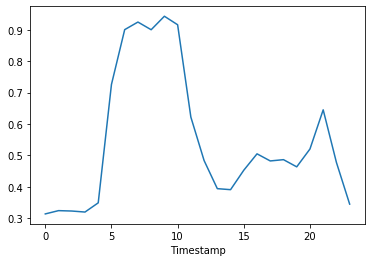

In [28]:
requests_bytime['if_success'].plot()

In [25]:
def PeakOrNot(timestamp):
    '''
    peak -- 8 to 10, 14 to 16
    offpeak -- rest hours
    '''
    hour = timestamp.hour
    if (hour <= 10 and hour >= 8) or (hour <= 16 and hour >= 14):
        return 'peak'
    else:
        return 'offpeak'

In [125]:
requests_bytime['PeakOrNot'] = requests_bytime.index.to_series().apply(lambda x: PeakOrNot(x))

AttributeError: 'int' object has no attribute 'hour'

In [126]:
requests_bytime.groupby('PeakOrNot').agg({'if_success':'mean','Requested_Pickup': 'count','Requested_Dropoff':'count','Actual_Pickup':'count','Actual_Dropoff':'count'})

KeyError: 'PeakOrNot'

In [22]:
import geopandas as gpd

In [23]:
manhattan = gpd.read_file('data/manhattan.geojson')

In [103]:
manhattan_intersect = manhattan[[x >= 0 for x in manhattan['id']]]

In [208]:
manhattan_intersect['id'] = manhattan_intersect['id'].astype(int)
manhattan_intersect.head()

/anaconda2/envs/gpd/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,w,geometry
0,0,NaN,POINT (-73.9975944 40.7140611)
1,1,NaN,POINT (-73.9980743 40.7137811)
2,2,NaN,POINT (-73.9615093 40.7602403)
3,3,NaN,POINT (-73.9692158 40.763488)
4,4,NaN,POINT (-73.9694382 40.7635824)


In [105]:
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,if_success,hour
0,2013-10-05 05:00:00,1149,725,218,3601,1,5
1,2013-10-05 05:00:00,1225,1714,2003,3601,1,5
2,2013-10-05 05:00:00,1237,3143,1314,2218,1,5
3,2013-10-05 05:00:00,1323,3566,1330,2573,1,5
4,2013-10-05 05:00:00,1328,2466,1323,2473,1,5


In [106]:
requests['hour'] = [x for x in requests.Timestamp.dt.hour]

In [107]:
requests_byid = requests[['Requested_Dropoff','if_success',
                            'Requested_Pickup']].groupby(['Requested_Pickup']).agg({'if_success':'mean',
                                                                                  'Requested_Dropoff': 'count'}).reset_index()

In [108]:
requests_pickup = requests[['Requested_Dropoff','if_success',
                            'Requested_Pickup','hour']].groupby(['Requested_Pickup','hour']).agg({'if_success':'mean',
                                                                                  'Requested_Dropoff': 'count'})
                            

In [109]:
requests_pickup = requests_pickup.reset_index()

In [129]:
requests_pickup

,Requested_Pickup,hour,if_success,Requested_Dropoff
0,0,0,1.000000,2
1,0,1,1.000000,1
2,0,2,0.000000,3
3,0,3,0.000000,1
4,0,4,0.500000,2
5,0,5,1.000000,1
6,0,6,1.000000,1
7,0,9,1.000000,1
8,0,13,0.000000,1
9,0,17,0.000000,1


In [110]:
requests_pickup['Requested_Pickup'].unique()

array([   0,    1,    2, ..., 4403, 4405, 4406])

In [223]:
df_dict = {}
keys = requests_pickup['Requested_Pickup'].unique()
for key in keys:
    try:
        df_dict[key].append(np.zeros(48))
    except KeyError:
        df_dict[key] = np.zeros(48)

In [224]:
df = pd.DataFrame(df_dict)

In [225]:
df = df.T

In [226]:
columns = []
for i in range(24):
    columns.append('T'+str(i)+'_Count')
    columns.append('T'+str(i)+'_Rate')
#     columns.append('T'+str(i)+'_Success')
#     columns.append('T'+str(i)+'_Fail')
df.columns = columns

In [227]:
df.head()

,T0_Count,T0_Rate,T1_Count,T1_Rate,T2_Count,T2_Rate,T3_Count,T3_Rate,T4_Count,T4_Rate,...,T19_Count,T19_Rate,T20_Count,T20_Rate,T21_Count,T21_Rate,T22_Count,T22_Rate,T23_Count,T23_Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
true_id = list(requests_pickup.Requested_Pickup.unique())

In [229]:
np.where(true_id == 15)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [230]:
matrix = [[0]*48 for _ in range(3561)]

In [231]:
true_id = requests_pickup.Requested_Pickup.unique()

for idx, row in requests_pickup.iterrows():
    hr = int(row['hour'])
    i = int(row['Requested_Pickup'])
    i = np.where(true_id == i)[0][0]
    matrix[i][hr] = row['Requested_Dropoff']
    matrix[i][2*hr+1] = row['if_success'] 
    

In [232]:
df_pickup = pd.DataFrame(matrix, columns = df.columns)

In [233]:
df_pickup.head()

,T0_Count,T0_Rate,T1_Count,T1_Rate,T2_Count,T2_Rate,T3_Count,T3_Rate,T4_Count,T4_Rate,...,T19_Count,T19_Rate,T20_Count,T20_Rate,T21_Count,T21_Rate,T22_Count,T22_Rate,T23_Count,T23_Rate
0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,1.00,...,0,0.000000,0,1.000000,0,0.000000,0,0.000000,0,0.500000
1,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,3.00,...,0,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
2,9.0,7.0,9.0,3.0,9.0,2.0,5.0,4.0,5.0,3.00,...,0,0.285714,0,0.333333,0,0.500000,0,0.142857,0,0.000000
3,10.0,10.0,15.0,12.0,5.0,2.0,1.0,1.0,1.0,0.20,...,0,0.750000,0,0.454545,0,0.666667,0,0.500000,0,0.055556
4,24.0,24.0,10.0,5.0,4.0,5.0,2.0,1.0,0.0,0.75,...,0,0.380952,0,0.318182,0,0.705882,0,0.411765,0,0.350000


In [234]:
df_pickup['intersect_id'] = true_id

In [235]:
df_pickup.tail()

,T0_Count,T0_Rate,T1_Count,T1_Rate,T2_Count,T2_Rate,T3_Count,T3_Rate,T4_Count,T4_Rate,...,T19_Rate,T20_Count,T20_Rate,T21_Count,T21_Rate,T22_Count,T22_Rate,T23_Count,T23_Rate,intersect_id
3556,10.0,15.0,13.0,19.0,13.0,6.0,3.0,1.000000,2.0,2.0,...,0.142857,0,0.400000,0,0.000,0,0.400000,0,0.181818,4401
3557,2.0,0.5,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,...,0.000000,0,0.500000,0,0.000,0,0.000000,0,0.000000,4402
3558,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0,0.000000,0,0.000,0,0.000000,0,0.000000,4403
3559,1.0,2.0,0.0,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0,0.000000,0,0.000,0,0.000000,0,0.000000,4405
3560,20.0,18.0,25.0,12.0,11.0,1.0,3.0,0.416667,2.0,1.0,...,0.071429,0,0.333333,0,0.625,0,0.388889,0,0.192308,4406


In [236]:
requests_pickup[requests_pickup['Requested_Pickup'] == 1]

,Requested_Pickup,hour,if_success,Requested_Dropoff
13,1,0,1.0,1
14,1,1,1.0,1
15,1,3,0.0,4
16,1,5,1.0,1
17,1,9,1.0,3
18,1,17,0.5,2
19,1,18,1.0,1
20,1,19,1.0,1


In [238]:
joined_df = pd.merge(manhattan_intersect, df_pickup, left_on = 'id', right_on = 'intersect_id', how = 'left')

In [239]:
joined_df.tail()

,id,w,geometry,T0_Count,T0_Rate,T1_Count,T1_Rate,T2_Count,T2_Rate,T3_Count,...,T19_Rate,T20_Count,T20_Rate,T21_Count,T21_Rate,T22_Count,T22_Rate,T23_Count,T23_Rate,intersect_id
4406,4406,NaN,POINT (-73.97587919999999 40.7447777),20.0,18.0,25.0,12.0,11.0,1.0,3.0,...,0.071429,0.0,0.333333,0.0,0.625,0.0,0.388889,0.0,0.192308,4406.0
4407,4407,NaN,POINT (-73.9116935 40.8728056),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,4408,NaN,POINT (-73.9339834 40.8593469),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4409,4409,NaN,POINT (-73.9322336 40.8664124),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4410,4410,NaN,POINT (-73.9326239 40.8632443),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
joined_df.to_file("task1.json", driver="GeoJSON")